<a href="https://colab.research.google.com/github/GreatLearningAIML1/delhi-may19-batch-Trapti04/blob/master/Face_detection_Questions_Project_CV_AIML_Online_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip show tensorflow


Name: tensorflow
Version: 1.15.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.6/dist-packages
Requires: opt-einsum, six, absl-py, protobuf, keras-preprocessing, wrapt, keras-applications, google-pasta, gast, astor, termcolor, tensorflow-estimator, grpcio, tensorboard, numpy, wheel
Required-by: stable-baselines, magenta, fancyimpute


In [2]:
!pip install --upgrade tensorflow

     |████████████████████████████████| 421.8MB 40kB/s 
     |████████████████████████████████| 3.9MB 48.0MB/s 
     |████████████████████████████████| 450kB 43.5MB/s 
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: tensorflow 1.15.0
    Uninstalling tensorflow-1.15.0:
      Successfully uninstalled tensorflow-1.15.0


# Instructions
- Some parts of the code are already done for you
- You need to execute all the cells
- You need to add the code where ever you see `"#### Add your code here ####"`
- Marks are mentioned along with the cells

# Face detection
Task is to predict the boundaries(mask) around the face in a given image.

## Dataset
Faces in images marked with bounding boxes. Have around 500 images with around 1100 faces manually tagged via bounding box.

### Mount Google drive if you are using google colab
- We recommend using Google Colab as you can face memory issues and longer runtimes while running on local

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


### Change current working directory to project folder (1 mark)

In [4]:
import os
#### Add your code here ####
print("Current Working Directory " , os.getcwd())

try:
        # Change the current working Directory    
        os.chdir("/content/drive/My Drive/Computer vision/ACV/ACV_Project_1_FaceDetection")
        print("Directory changed to " + os.getcwd())
except OSError:
        print("Can't change the Current Working Directory")  

Current Working Directory  /content
Directory changed to /content/drive/My Drive/Computer vision/ACV/ACV_Project_1_FaceDetection


### Load the "images.npy" file (2 marks)
- This file contains images with details of bounding boxes

In [0]:
import numpy as np
data = np.load('images.npy', allow_pickle = True)

In [6]:
data.shape

(409, 2)

In [7]:
data.view() # data consists of the object array and associated list. object array has dtype = uint8;
            #list contians a data dictionary  - label,notes and points. Points are x1,y1,x2,y2 , image width and image height

array([[array([[[42, 37, 34],
        [56, 51, 48],
        [71, 66, 63],
        ...,
        [23, 33, 34],
        [26, 36, 37],
        [28, 38, 39]],

       [[40, 35, 32],
        [51, 46, 43],
        [64, 59, 56],
        ...,
        [27, 36, 35],
        [24, 33, 32],
        [26, 35, 34]],

       [[43, 38, 35],
        [51, 46, 43],
        [61, 56, 53],
        ...,
        [28, 30, 27],
        [33, 35, 32],
        [35, 37, 34]],

       ...,

       [[56, 47, 40],
        [57, 48, 41],
        [61, 52, 45],
        ...,
        [67, 48, 42],
        [55, 35, 28],
        [60, 40, 33]],

       [[53, 44, 37],
        [54, 45, 38],
        [57, 48, 41],
        ...,
        [59, 40, 34],
        [60, 40, 33],
        [54, 34, 27]],

       [[53, 44, 37],
        [54, 45, 38],
        [57, 48, 41],
        ...,
        [59, 40, 34],
        [70, 50, 43],
        [64, 44, 37]]], dtype=uint8),
        list([{'label': ['Face'], 'notes': '', 'points': [{'x': 0.08615384615384615

### Check one sample from the loaded "images.npy" file  (2 marks)
Hint - print data[10][1] 

In [8]:
#### Add your code here ####
print(data[10][1])

[{'label': ['Face'], 'notes': '', 'points': [{'x': 0.48, 'y': 0.10385756676557864}, {'x': 0.7716666666666666, 'y': 0.6795252225519288}], 'imageWidth': 600, 'imageHeight': 337}]


### Set image dimensions   (1 mark)
- Initialize image height, image width with value: 224 

In [0]:
IMAGE_WIDTH = 224
IMAGE_HEIGHT = 224

### Create features and labels
- Here feature is the image
- The label is the mask
- Images will be stored in "X_train" array
- Masks will be stored in "masks" array

In [0]:
import cv2
from tensorflow.keras.applications.mobilenet import preprocess_input

masks = np.zeros((int(data.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH))
X_train = np.zeros((int(data.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH, 3))
for index in range(data.shape[0]):
    img = data[index][0]
    img = cv2.resize(img, dsize=(IMAGE_HEIGHT, IMAGE_WIDTH), interpolation=cv2.INTER_CUBIC)
    try:
      img = img[:, :, :3]
    except:
      continue
    X_train[index] = preprocess_input(np.array(img, dtype=np.float32))
    for i in data[index][1]:
        x1 = int(i["points"][0]['x'] * IMAGE_WIDTH)
        x2 = int(i["points"][1]['x'] * IMAGE_WIDTH)
        y1 = int(i["points"][0]['y'] * IMAGE_HEIGHT)
        y2 = int(i["points"][1]['y'] * IMAGE_HEIGHT)
        masks[index][y1:y2, x1:x2] = 1

### Print the shape of X_train and mask array  (1 mark)

In [11]:
print(X_train.shape)

(409, 224, 224, 3)


In [12]:
print(masks.shape)

(409, 224, 224)


### Print a sample image and image array

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[[ 0.5529412   0.43529415 -0.09019607]
  [ 0.6156863   0.49803925 -0.02745098]
  [ 0.62352943  0.50588238 -0.01960784]
  ...
  [ 0.74117649  0.34117651 -0.48235291]
  [ 0.56078434  0.14509809 -0.67058825]
  [ 0.60784316  0.16078436 -0.63137257]]

 [[ 0.57647061  0.45882356 -0.04313725]
  [ 0.63921571  0.52156866  0.01176476]
  [ 0.57647061  0.45882356 -0.05098039]
  ...
  [ 0.70980394  0.3176471  -0.49803919]
  [ 0.66274512  0.24705887 -0.56862748]
  [ 0.6156863   0.16078436 -0.63137257]]

 [[ 0.63921571  0.52156866  0.01176476]
  [ 0.63921571  0.52156866  0.01176476]
  [ 0.5529412   0.43529415 -0.0745098 ]
  ...
  [ 0.73333335  0.35686278 -0.4588235 ]
  [ 0.67843139  0.27058828 -0.52156866]
  [ 0.69411767  0.24705887 -0.56078434]]

 ...

 [[-0.5529412  -0.96862745 -0.96862745]
  [-0.48235291 -0.98431373 -0.98431373]
  [-0.48235291 -0.98431373 -1.        ]
  ...
  [-0.96078432 -0.99215686 -0.99215686]
  [-0.9137255  -0.96078432 -0.95294118]
  [-0.93725491 -0.99215686 -0.98431373]]

 [

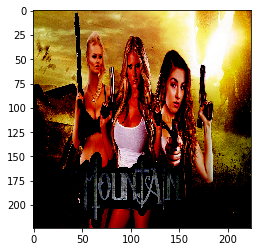

In [13]:
from matplotlib import pyplot
n = 100
print(X_train[n])
pyplot.imshow(X_train[n])

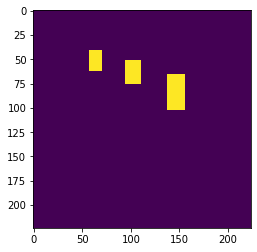

In [14]:
pyplot.imshow(masks[n])

In [15]:
print(masks[n])

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [16]:
masks.shape

(409, 224, 224)

## Create the model (10 marks)
- Add MobileNet as model with below parameter values
  - input_shape: IMAGE_HEIGHT, IMAGE_WIDTH, 3
  - include_top: False
  - alpha: 1.0
  - weights: "imagenet"
- Add UNET architecture layers
  - This is the trickiest part of the project, you need to research and implement it correctly

In [0]:
import tensorflow as tf
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.layers import Concatenate, UpSampling2D, Conv2D, Reshape
from tensorflow.keras.models import Model


def create_model(trainable=True):
    model = MobileNet(input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3), alpha=1.0,include_top=False, weights='imagenet')
    for layer in model.layers:
        layer.trainable = trainable
    #inputs = model.output
    
    # Add all the UNET layers here
    # we will use the encoder portion as pretrained layers from mobilenet and only add the decoder layers
    u1 = tf.keras.layers.UpSampling2D(size = (2, 2))(model.get_layer(name= "conv_pw_13_relu").output)
    u1 = tf.keras.layers.concatenate([u1, model.get_layer(name= "conv_pw_11_relu").output])
    u1 = tf.keras.layers.BatchNormalization()(u1)
    c1 = tf.keras.layers.Conv2D(512, (3, 3), activation=tf.keras.activations.relu, padding = 'same')(u1)
    #c1 = tf.keras.layers.Dropout(0.2)(c1)
    c1 = tf.keras.layers.Conv2D(512, (3, 3), activation=tf.keras.activations.relu, padding ='same')(c1)

    u2 = tf.keras.layers.UpSampling2D(size = (2, 2))(c1)
    u2 = tf.keras.layers.concatenate([u2, model.get_layer(name= "conv_pw_5_relu").output])
    u2 = tf.keras.layers.BatchNormalization()(u2)
    c2 = tf.keras.layers.Conv2D(256, (3, 3), activation=tf.keras.activations.relu, padding = 'same')(u2)
    #c2 = tf.keras.layers.Dropout(0.2)(c2)
    c2 = tf.keras.layers.Conv2D(256, (3, 3), activation=tf.keras.activations.relu, padding = 'same')(c2)

    u3 = tf.keras.layers.UpSampling2D(size = (2, 2))(c2)
    u3 = tf.keras.layers.concatenate([u3, model.get_layer(name= "conv_pw_3_relu").output])
    u3 = tf.keras.layers.BatchNormalization()(u3)
    c3 = tf.keras.layers.Conv2D(128, (3, 3), activation=tf.keras.activations.relu, padding = 'same')(u3)
    #c3 = tf.keras.layers.Dropout(0.2)(c3)
    c3 = tf.keras.layers.Conv2D(128, (3, 3), activation=tf.keras.activations.relu, padding = 'same')(c3)

    u4 = tf.keras.layers.UpSampling2D(size = (2, 2))(c3)
    u4 = tf.keras.layers.concatenate([u4, model.get_layer(name= "conv_pw_1_relu").output])
    u4 = tf.keras.layers.BatchNormalization()(u4)
    c4 = tf.keras.layers.Conv2D(64, (3, 3), activation=tf.keras.activations.relu, padding = 'same')(u4)
    #c4 = tf.keras.layers.Dropout(0.2)(c4)
    c4 = tf.keras.layers.Conv2D(64, (3, 3), activation=tf.keras.activations.relu, padding = 'same')(c4)

    u5 = tf.keras.layers.UpSampling2D(size = (2, 2))(c4)
    #u5 = tf.keras.layers.concatenate([u5, model.get_layer(name= "conv_pw_1_relu").output])
    c5 = tf.keras.layers.Conv2D(32, (3, 3), activation=tf.keras.activations.relu, padding = 'same')(u5)
    #c5 = tf.keras.layers.Dropout(0.2)(c5)
    c5 = tf.keras.layers.Conv2D(3,(3, 3), activation=tf.keras.activations.relu, padding = 'same')(c5)
    c5 = tf.keras.layers.Conv2D(1,(3,3),activation=tf.keras.activations.sigmoid, padding = 'same')(c5)
    c5 = tf.keras.layers.Reshape((224, 224))(c5)
  
    
    # Build U-Net model
    
    #model.outputs= c5

    from tensorflow.keras.models import Model

    unet_model= Model(inputs=model.input,outputs=c5)


    return model, u1,c1,u2,c2,u3,c3,u4,c4,u5,c5,unet_model

### Call the create_model function

In [39]:
# Give trainable=False as argument, if you want to freeze lower layers for fast training (but low accuracy)
model,u1,c1,u2,c2,u3,c3,u4,c4,u5,c5,unet_model = create_model(trainable = False)

# Print summary
model.summary()




Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32

In [40]:
#print decoder
print(u1)
print(c1)
print(u2)
print(c2)
print(u3)
print(c3)
print(u4)
print(c4)
print(u5)
print(c5)

Tensor("batch_normalization_4/Identity:0", shape=(None, 14, 14, 1536), dtype=float32)
Tensor("conv2d_12/Identity:0", shape=(None, 14, 14, 512), dtype=float32)
Tensor("batch_normalization_5/Identity:0", shape=(None, 28, 28, 768), dtype=float32)
Tensor("conv2d_14/Identity:0", shape=(None, 28, 28, 256), dtype=float32)
Tensor("batch_normalization_6/Identity:0", shape=(None, 56, 56, 384), dtype=float32)
Tensor("conv2d_16/Identity:0", shape=(None, 56, 56, 128), dtype=float32)
Tensor("batch_normalization_7/Identity:0", shape=(None, 112, 112, 192), dtype=float32)
Tensor("conv2d_18/Identity:0", shape=(None, 112, 112, 64), dtype=float32)
Tensor("up_sampling2d_9/Identity:0", shape=(None, 224, 224, 64), dtype=float32)
Tensor("reshape_1/Identity:0", shape=(None, 224, 224), dtype=float32)


In [41]:
unet_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 32) 864         conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 32) 128         conv1[0][0]                      
____________________________________________________________________________________________

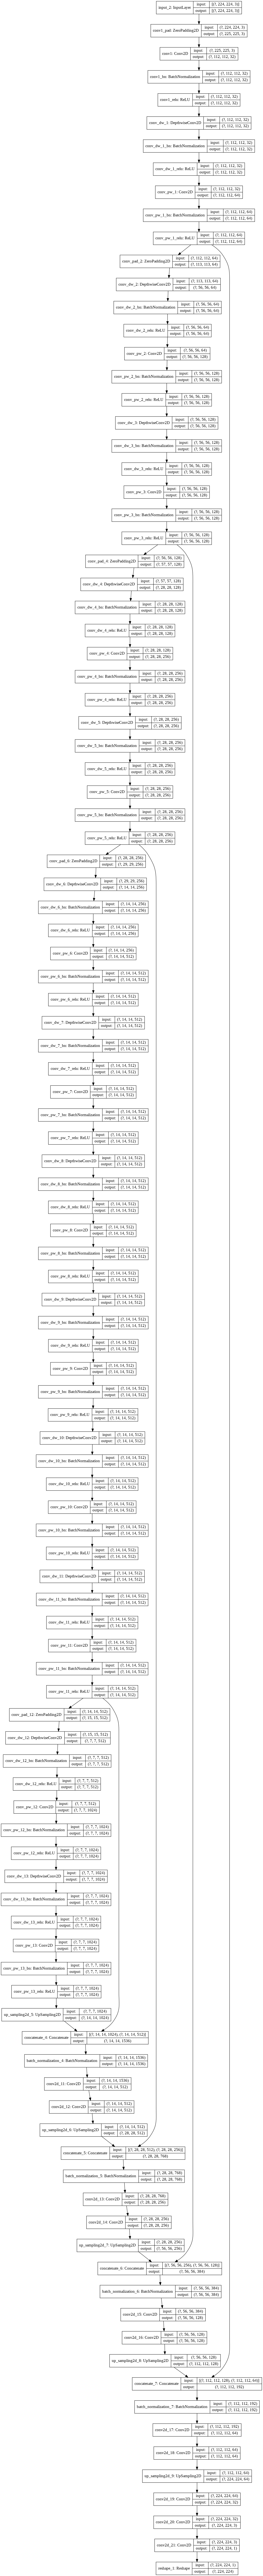

In [42]:
tf.keras.utils.plot_model(unet_model, show_shapes=True)

### Define dice coefficient function (5 marks)
- Create a function to calculate dice coefficient


In [0]:
def dice_coefficient(y_true, y_pred):
    numerator = 2.0 * tf.reduce_sum(y_true * y_pred)
    denominator = tf.reduce_sum(y_true + y_pred)
    return numerator / (denominator + tf.keras.backend.epsilon())

### Define loss

In [0]:
def loss(y_true, y_pred):
    return tf.keras.losses.binary_crossentropy(y_true, y_pred) - tf.math.log(dice_coefficient(y_true, y_pred) + tf.keras.backend.epsilon())

### Compile the model (2 marks)
- Complie the model using below parameters
  - loss: use the loss function defined above
  - optimizers: use Adam optimizer
  - metrics: use dice_coefficient function defined above

In [0]:
from tensorflow.keras.optimizers import Adam

In [0]:
optimizer = Adam(lr=1e-3)

In [0]:
#### Add your code here ####
unet_model.compile(optimizer=optimizer,loss=loss,metrics=[dice_coefficient] )
#unet_model.compile(optimizer='Adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=[tf.keras.metrics.MeanIoU(num_classes=2)] )
#unet_model.compile(optimizer='Adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=["accuracy"] )
# both custom loss and custom_coefficent not working with 3 dim output. need to understand how to make it work

### Define checkpoint and earlystopping

In [45]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
checkpoint = ModelCheckpoint("model-{loss:.2f}.h5", monitor="loss", verbose=1, save_best_only=True,
                             save_weights_only=True, mode="min", period=1)
stop = EarlyStopping(monitor="loss", patience=5, mode="min")
reduce_lr = ReduceLROnPlateau(monitor="loss", factor=0.2, patience=5, min_lr=1e-6, verbose=1, mode="min")

### Fit the model (2 marks)
- Fit the model using below parameters
  - epochs: you can decide
  - batch_size: 1
  - callbacks: checkpoint, reduce_lr, stop

In [0]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X_train, masks, test_size=0.3, random_state=1)

In [46]:
#### Add your code here ####
BATCH_SIZE = 1
EPOCHS = 30
unet_model.fit(x_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_data=(x_test, y_test), callbacks = [checkpoint,stop,reduce_lr])

Train on 286 samples, validate on 123 samples
Epoch 1/30
285/286 [============================>.] - ETA: 0s - loss: 1.4365 - dice_coefficient: 0.3796
Epoch 00001: loss improved from inf to 1.43589, saving model to model-1.44.h5
286/286 [==============================] - 13s 44ms/sample - loss: 1.4359 - dice_coefficient: 0.3799 - val_loss: 1.2813 - val_dice_coefficient: 0.4329
Epoch 2/30
285/286 [============================>.] - ETA: 0s - loss: 1.1004 - dice_coefficient: 0.4673
Epoch 00002: loss improved from 1.43589 to 1.10056, saving model to model-1.10.h5
286/286 [==============================] - 11s 37ms/sample - loss: 1.1006 - dice_coefficient: 0.4672 - val_loss: 1.1708 - val_dice_coefficient: 0.4765
Epoch 3/30
285/286 [============================>.] - ETA: 0s - loss: 0.9180 - dice_coefficient: 0.5282
Epoch 00003: loss improved from 1.10056 to 0.91701, saving model to model-0.92.h5
286/286 [==============================] - 10s 36ms/sample - loss: 0.9170 - dice_coefficient: 0.52

### Get the predicted mask for a sample image   (3 marks)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(224, 224, 3)


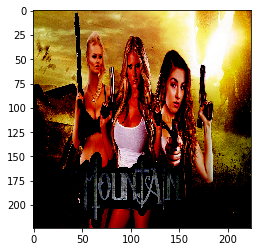

In [47]:
n = 100
sample_image = X_train[n]
print(sample_image.shape)
pyplot.imshow(sample_image)

(224, 224)

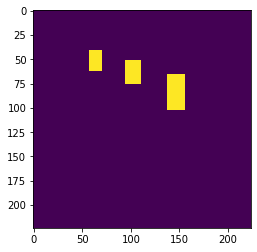

In [48]:
gt_mask = masks[n]
pyplot.imshow(gt_mask)
gt_mask.shape


In [0]:
def create_mask(pred_mask):
  pred_mask = tf.argmax(pred_mask, axis=-1)
  pred_mask = pred_mask[...,  ]
  return pred_mask[0]

(1, 224, 224)


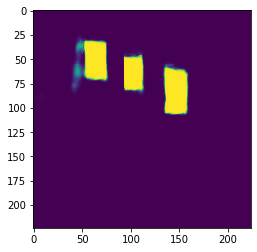

In [58]:
pred_ = unet_model.predict(sample_image[tf.newaxis, ...])
print(pred_.shape)
#pred_mask = create_mask(pred_)
pred_ = pred_.reshape(224,224)
pyplot.imshow(pred_)


### Impose the mask on the image (3 marks)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


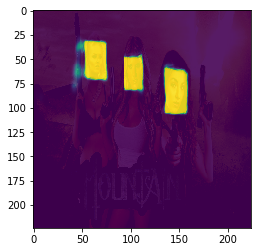

In [70]:
import matplotlib.pyplot as plt
out_image = image
plt.imshow(sample_image)
plt.imshow(pred_, alpha=0.9)